<a href="https://colab.research.google.com/github/SophieShin/ML_selfstudy/blob/main/W3_Classification_k_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('http://raw.githubusercontent.com/steve3789/Python_First_AI/master/data/csv/basketball_stat.csv')

In [2]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [3]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'STL an 2P in 2d plane')

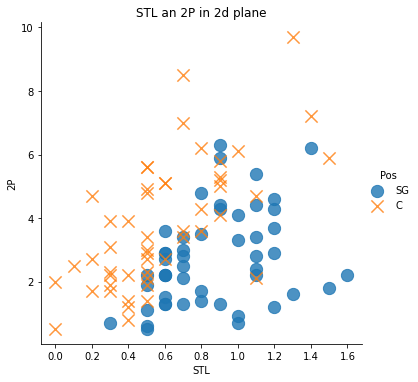

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('STL', '2P', data = df, fit_reg = False, scatter_kws = {'s':150}, markers = ['o', 'x'], hue = 'Pos')
plt.title('STL an 2P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AST and 2P in 2d plane')

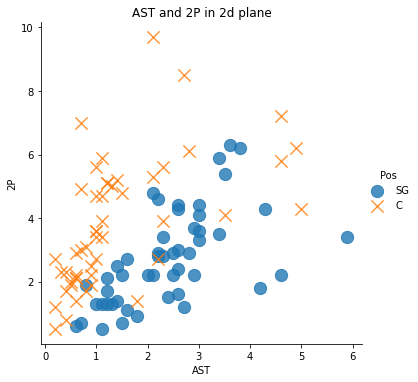

In [8]:
sns.lmplot('AST', '2P', data = df, fit_reg = False, scatter_kws = {'s':150}, markers = ['o', 'x'], hue = 'Pos')
plt.title('AST and 2P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BLK and 3P in 2d plane')

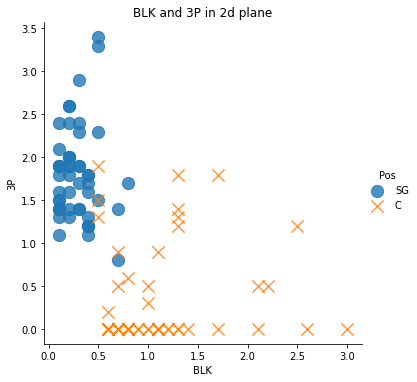

In [9]:
sns.lmplot('BLK', '3P', data = df, fit_reg = False, scatter_kws = {'s':150}, markers = ['o', 'x'], hue = 'Pos')
plt.title('BLK and 3P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TRB and 3P in 2d plane')

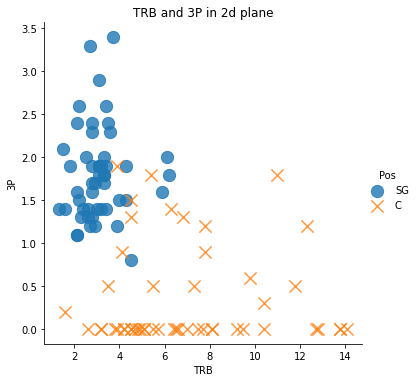

In [11]:
sns.lmplot('TRB', '3P', data = df, fit_reg = False, scatter_kws={'s':150},markers = ['o', 'x'], hue = 'Pos')
plt.title('TRB and 3P in 2d plane')

In [12]:
df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True) #분별력 없는 feature 데이터에서 제거하기
df.head

<bound method NDFrame.head of               Player Pos   3P   TRB  BLK
0       Alex Abrines  SG  1.4   1.3  0.1
1       Steven Adams   C  0.0   7.7  1.0
2      Alexis Ajinca   C  0.0   4.5  0.6
3     Chris Andersen   C  0.0   2.6  0.6
4        Will Barton  SG  1.5   4.3  0.5
..               ...  ..  ...   ...  ...
95    Nikola Vucevic   C  0.3  10.4  1.0
96       Dwyane Wade  SG  0.8   4.5  0.7
97      Dion Waiters  SG  1.8   3.3  0.4
98  Hassan Whiteside   C  0.0  14.1  2.1
99      Lou Williams  SG  2.0   2.5  0.2

[100 rows x 5 columns]>

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)
print(train.shape)
print(test.shape)

(80, 5)
(20, 5)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_K_range = train.shape[0]//2
#최적의 k를 찾기위해 교차 검증을 수행할 k범위를 3부터 학습데이터 개수의 절반까지 지정

k_list = []
for i in range(3, max_K_range, 2):
  k_list.append(i)

k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [15]:
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]


In [19]:
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv = 10, scoring = 'accuracy')
  cross_validation_scores.append(scores.mean())

In [20]:
cross_validation_scores

[0.95,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9,
 0.9125,
 0.9,
 0.9,
 0.875,
 0.875,
 0.8625,
 0.8375,
 0.8375,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8125]

Text(0, 0.5, 'Accuracy')

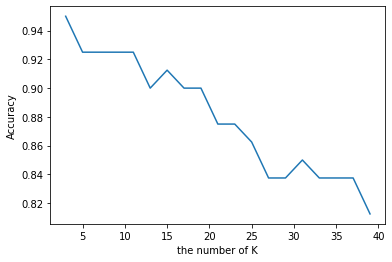

In [21]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of K')
plt.ylabel('Accuracy')